In [2]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('C:\\Users\\user\\Downloads\\Train.csv')


c:\Users\user\anaconda4\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [4]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
df['bank_account'].replace('Yes', 1).replace('No', 0)

C:\Users\user\AppData\Local\Temp\ipykernel_38016\324982970.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['bank_account'].replace('Yes', 1).replace('No', 0)


0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64

In [8]:
def plot_sessions_per_group(df, group, viz_type='bar'):
    sessions_per_group = df.groupby(group).size().reset_index(name='sessions').sort_values(by='sessions')
    if viz_type == 'bar':
        return px.bar(sessions_per_group,
                      x=group,
                      y='sessions',
                      title=f'Number of sessions per {group}',
                      text='sessions')
    elif viz_type == 'pie':
        return px.pie(sessions_per_group,
                      names=group,
                      values='sessions',
                      title=f'Distribution of sessions per {group}')
    else:
        raise ValueError("viz_type can only be 'bar' or 'pie'")

In [5]:
plot_sessions_per_group(df,'country', viz_type='pie')

In [6]:
plot_sessions_per_group(df, 'cellphone_access')

#HSGHSHVS

In [7]:
plot_sessions_per_group(df, 'location_type')

  country  year    uniqueid bank_account location_type cellphone_access  \
0   Kenya  2018  uniqueid_1          Yes         Rural              Yes   
1   Kenya  2018  uniqueid_2           No         Rural               No   
2   Kenya  2018  uniqueid_3          Yes         Urban              Yes   
3   Kenya  2018  uniqueid_4           No         Rural              Yes   
4   Kenya  2018  uniqueid_5           No         Urban               No   

   household_size  age_of_respondent gender_of_respondent  \
0               3                 24               Female   
1               5                 70               Female   
2               5                 26                 Male   
3               5                 34               Female   
4               8                 26                 Male   

  relationship_with_head           marital_status  \
0                 Spouse  Married/Living together   
1      Head of Household                  Widowed   
2         Other relativ

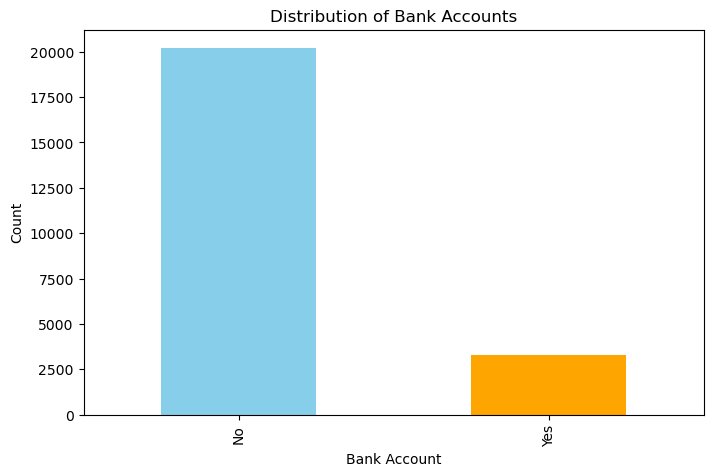

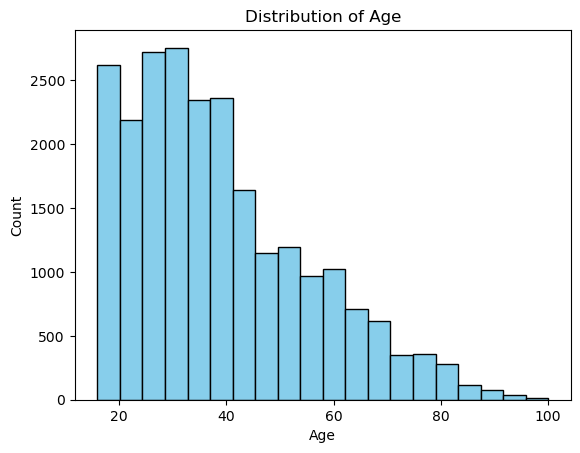

ValueError: could not convert string to float: 'Kenya'

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Overview of the Data
print(df.head())
print(df.describe())
print(df.info())

# Target Variable Distribution
plt.figure(figsize=(8, 5))
df['bank_account'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Bank Accounts')
plt.xlabel('Bank Account')
plt.ylabel('Count')
plt.show()

# Feature Analysis
# Example: Histogram for 'age_of_respondent'
plt.hist(df['age_of_respondent'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Correlation Analysis
correlation_matrix = df.corr()
print(correlation_matrix)

In [19]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import numpy as np


# Assuming 'df' is your DataFrame and it's already been defined earlier in your code

# Before applying one-hot encoding, check if the columns exist in the DataFrame
columns_to_encode = ['country', 'location_type', 'cellphone_access', 'gender_of_respondent', 
                     'relationship_with_head', 'marital_status', 'education_level', 'job_type', 'bank_account']
columns_exist = [col for col in columns_to_encode if col in df.columns]

# Convert categorical variables to numerical using one-hot encoding
encoder = OneHotEncoder(drop='first', sparse=False)
df_encoded = pd.DataFrame(encoder.fit_transform(df[columns_exist]))
df_encoded.columns = encoder.get_feature_names_out(columns_exist)
df = pd.concat([df.drop(columns_exist, axis=1), df_encoded], axis=1)

# Check for missing values and impute if necessary

c:\Users\user\anaconda4\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


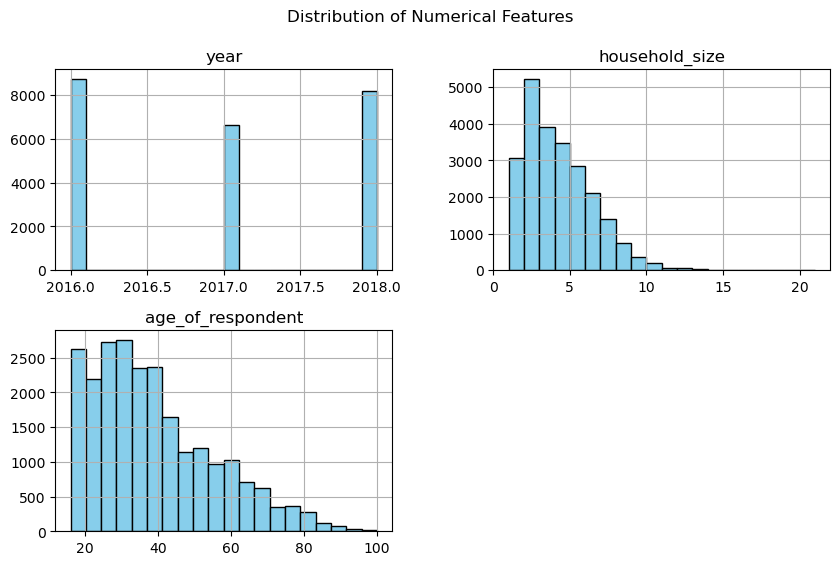

In [11]:
# Explore the distribution of numerical features
num_features = ['year', 'household_size', 'age_of_respondent']
df[num_features].hist(figsize=(10, 6), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

In [20]:
# Split the data into features (X) and target (y)
x = df.drop(['bank_account_1', 'uniqueid'], axis=1)  # Drop both columns

# Check for unique values

# Replace "Yes" with 1 and "No" with 0 (adjust replacements as needed)

# Now you can convert the column to integer without errors
y = df['bank_account_1'].astype('int')



KeyError: "['bank_account_1'] not found in axis"

In [27]:
df.bank_account_1

0        1.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
23519    0.0
23520    0.0
23521    0.0
23522    0.0
23523    0.0
Name: bank_account_1, Length: 23524, dtype: float64

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=100)

In [64]:
x_train = x_train.drop(columns=['uniqueid'])

KeyError: "['uniqueid'] not found in axis"

In [57]:
# Initialize the model
model = RandomForestClassifier(random_state=100)

# Train the model
model.fit(x_train, y_train)


RandomForestClassifier(random_state=100)